In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
salary_data=pd.read_csv("Salary_Data.csv")

In [3]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


###  initial analysis and understsnding the data:

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


###  Missing data: 

In [6]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

###  duplicate data:

In [7]:
salary_data.duplicated().sum()

0

####   no duplicate data

###  outliers detection:

####   Histogram plot

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

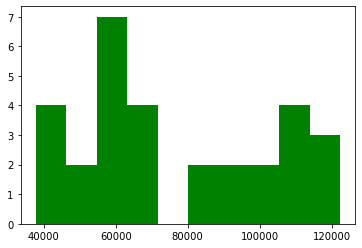

In [8]:
plt.hist(x="Salary",data=salary_data,color="green")

#### Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee0a8fde20>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee0a90c4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee0a8fd9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee0a90cbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee0a90cf70>],
 'means': []}

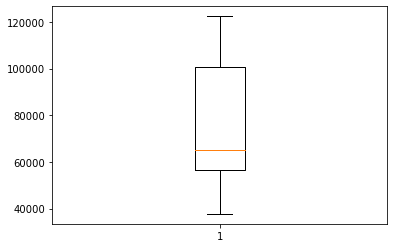

In [9]:
plt.boxplot(x="Salary",data=salary_data)

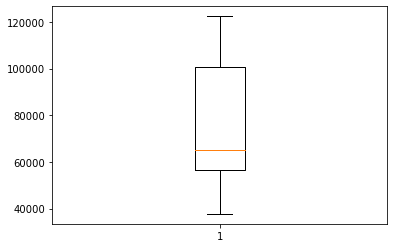

In [10]:
box=plt.boxplot(x="Salary",data=salary_data)

In [11]:
[i.get_ydata()  for i in box['fliers']]

[array([], dtype=float64)]

####  so there is no  outliers 

###  Correlation analysis:

In [12]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

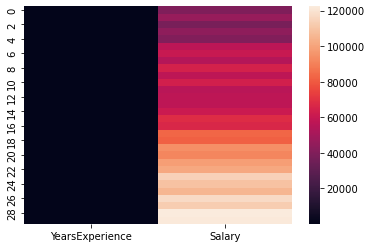

In [13]:
sns.heatmap(data=salary_data)

## Assumption Test:

###  1.Normality test

<AxesSubplot:xlabel='Salary', ylabel='Density'>

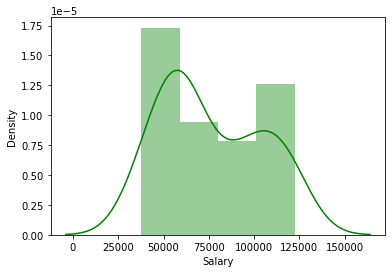

In [14]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(a=salary_data["Salary"],color="green")

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

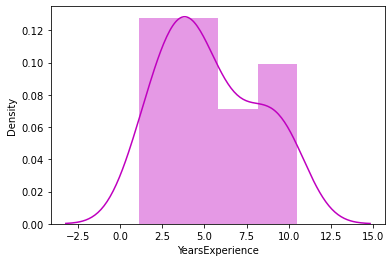

In [15]:
sns.distplot(a=salary_data["YearsExperience"],color="m")

####  distribution is not perfectly normal 

### 2. linearity test:

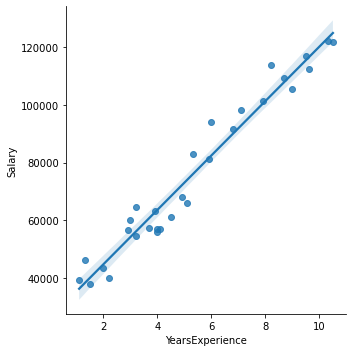

In [16]:
sns.lmplot(x="YearsExperience",y="Salary",data=salary_data)

###  No autoregression

###   Model Building Approach  with original data

In [19]:
salary_data_copy_9=salary_data.copy()

In [21]:
salary_data_copy_9

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [22]:
salary_data_copy_9.columns

Index(['YearsExperience', 'Salary'], dtype='object')

###  linearity test:

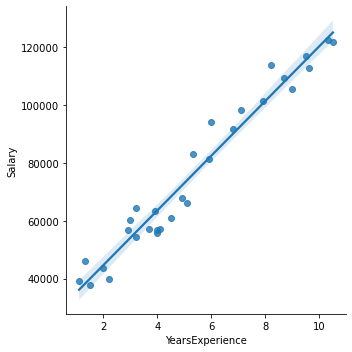

In [23]:
sns.lmplot(x="YearsExperience",y="Salary",data=salary_data_copy_9)

## Model Building:

In [24]:
import statsmodels.formula.api as smf

In [25]:
model=smf.ols('Salary~YearsExperience',data=salary_data_copy_9).fit()

In [26]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [27]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        23:46:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print("rsquare:",model.rsquared,"\n adj_rsquare:",model.rsquared_adj)

rsquare: 0.9569566641435086 
 adj_rsquare: 0.9554194021486339


###  Regression plot:

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

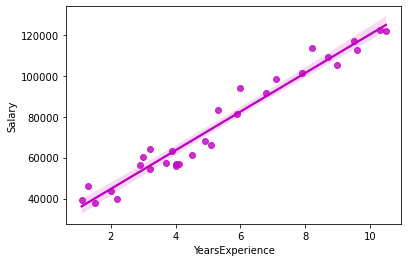

In [30]:
sns.regplot(x="YearsExperience",y="Salary",data=salary_data_copy_9,color="m")

###  Prediction:

In [31]:
y_pred=model.predict(salary_data_copy_9["YearsExperience"])
y_pred.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

###  Evaluation :

In [32]:
error=salary_data_copy_9["Salary"]-y_pred

In [33]:
error.head()

0    3155.841248
1    8127.848783
2   -2236.143681
3   -1167.124842
4   -6691.117306
dtype: float64

###  Model evaluation dataframe

In [40]:
eval_df=pd.DataFrame({"Actual":salary_data_copy_9["Salary"],"Predicted":y_pred,"Difference":error})
eval_df.head()

,Actual,Predicted,Difference
0,39343.0,36187.158752,3155.841248
1,46205.0,38077.151217,8127.848783
2,37731.0,39967.143681,-2236.143681
3,43525.0,44692.124842,-1167.124842
4,39891.0,46582.117306,-6691.117306


In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
print("Mean absolute error:",mean_absolute_error(y_true=salary_data_copy_9["Salary"],y_pred=y_pred))


Mean absolute error: 4644.20128944354


###  Zero residual mean test:

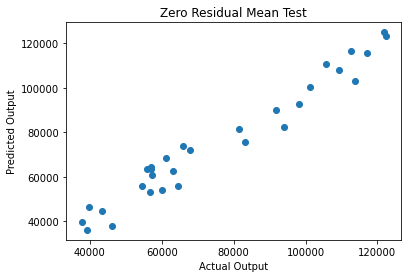

In [36]:
plt.scatter(x =salary_data_copy_9["Salary"],y = y_pred)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Zero Residual Mean Test')
plt.show()

###  Homoscadasticity Test:

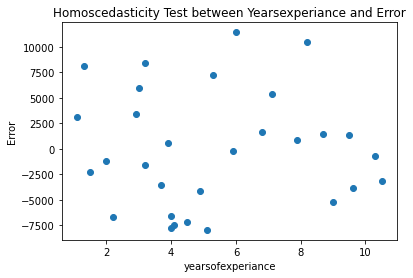

In [37]:
plt.scatter(x = salary_data_copy_9["YearsExperience"],y = error)
plt.xlabel('yearsofexperiance')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between Yearsexperiance and Error')
plt.show()

## Transformation

###  1. Standard Scaler
###  2.  Log Transform

### 2. Standard scaler Transformation:

In [43]:
salary_data_copy_2=salary_data.copy()
salary_data_copy_2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [44]:
x=salary_data_copy_2["YearsExperience"]


In [45]:
x_df=pd.DataFrame(x,columns=["YearsExperience"])



In [46]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler=std_scaler.fit_transform(x_df)

In [51]:
std_scaler


array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [52]:
std_scaler=pd.DataFrame(std_scaler)
std_scaler.columns=["YearsExperience"]
std_scaler.head()

,YearsExperience
0,-1.510053
1,-1.438373
2,-1.366693
3,-1.187494
4,-1.115814


In [53]:
salary_data_copy_3=salary_data_copy_2.drop("YearsExperience",axis=1)

In [55]:
salary_data_copy_3["YearsExperience"]=std_scaler

In [57]:
salary_data_copy_3.head()

,Salary,YearsExperience
0,39343.0,-1.510053
1,46205.0,-1.438373
2,37731.0,-1.366693
3,43525.0,-1.187494
4,39891.0,-1.115814


In [58]:
scaled_data=salary_data_copy_3

In [59]:
scaled_data.columns

Index(['Salary', 'YearsExperience'], dtype='object')

###  Linearity Test:

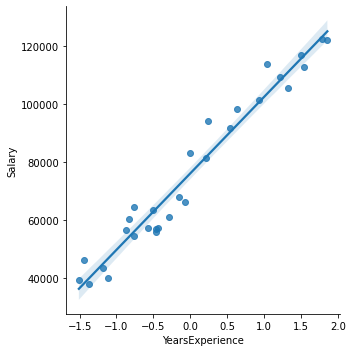

In [60]:
sns.lmplot(x="YearsExperience",y="Salary",data=scaled_data)

## Model Building:

In [61]:
model1=smf.ols('Salary~YearsExperience' ,data=scaled_data).fit()

In [62]:
model1.params

Intercept          76003.000000
YearsExperience    26367.182444
dtype: float64

In [63]:
model1.pvalues

Intercept          2.579093e-33
YearsExperience    1.143068e-20
dtype: float64

In [64]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        00:00:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          7.6e+04   1056.797     71.918      0.000    7.38e+04    7.82e+04
YearsExperience  2.637e+04   1056.797     24.950      0.000    2.42e+04    2.85e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
print("rsquare:",model1.rsquared,"\n adj_rsquare:",model1.rsquared_adj)

rsquare: 0.9569566641435086 
 adj_rsquare: 0.9554194021486339


###  Regression plot:

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

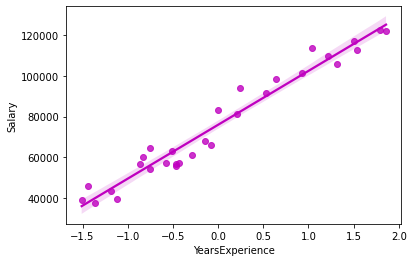

In [66]:
sns.regplot(x="YearsExperience",y="Salary",data=scaled_data,color="m")

###  Value prediction:

In [67]:
y1_predict=model1.predict(scaled_data["YearsExperience"],transform=True)

In [68]:
y1_predict.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [69]:
scaled_data.head()

,Salary,YearsExperience
0,39343.0,-1.510053
1,46205.0,-1.438373
2,37731.0,-1.366693
3,43525.0,-1.187494
4,39891.0,-1.115814


###  Evaluation:

In [70]:
error2=scaled_data["Salary"]-y1_predict
error2.head()

0    3155.841248
1    8127.848783
2   -2236.143681
3   -1167.124842
4   -6691.117306
dtype: float64

In [71]:
print("Mean absolute error:",mean_absolute_error(y_true=scaled_data["YearsExperience"],y_pred=y1_predict))

Mean absolute error: 76002.99999999997


###  Model Evaluation dataframe:

In [74]:
evaluate_df=pd.DataFrame({"Actual":scaled_data["Salary"],"Predicted":y1_predict,"difference":error2})
evaluate_df.head(10)

,Actual,Predicted,difference
0,39343.0,36187.158752,3155.841248
1,46205.0,38077.151217,8127.848783
2,37731.0,39967.143681,-2236.143681
3,43525.0,44692.124842,-1167.124842
4,39891.0,46582.117306,-6691.117306
5,56642.0,53197.090931,3444.909069
6,60150.0,54142.087163,6007.912837
7,54445.0,56032.079627,-1587.079627
8,64445.0,56032.079627,8412.920373
9,57189.0,60757.060788,-3568.060788


###  Homoscadasticity Test:

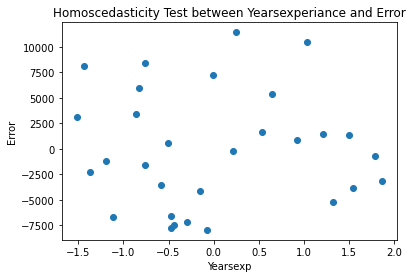

In [75]:
plt.scatter(x = scaled_data["YearsExperience"],y = error2)
plt.xlabel("Yearsexp")
plt.ylabel('Error')
plt.title('Homoscedasticity Test between Yearsexperiance and Error')

plt.show()

###  Zero residual mean test:

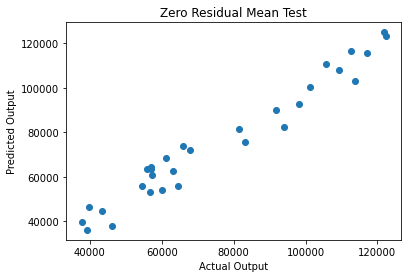

In [76]:
plt.scatter(x =scaled_data["Salary"],y = y1_predict)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Zero Residual Mean Test')
plt.show()

###  from the above analysis we  can say  :
####   **  they are almost equal in performance **


####   we choose  **Standard Scalar Model**   as our model 
 

###  using  Standard Scalar Model:  

###  predicting   salary for unknown data:

In [79]:
new_data=pd.Series([3.0,4.5,6.5])

In [77]:
sl=StandardScaler()

In [82]:
x_test=pd.DataFrame(new_data,columns=["YearsExperience"])
x_test

,YearsExperience
0,3.0
1,4.5
2,6.5


####  After standard scaler transform:

In [88]:
x_test=sl.fit_transform(x_test)
x_test1=pd.DataFrame(x_test,columns=["YearsExperience"])
x_test1

,YearsExperience
0,-1.162476
1,-0.116248
2,1.278724


### Prediction:

In [89]:
y2_pred=model1.predict(x_test1)

In [90]:
y2_pred

0     45351.773006
1     72937.877301
2    109719.349693
dtype: float64

### we can have a idea of performance  of the model from its R-squared values:  

In [93]:
print("rsquare:",model1.rsquared,"\n adj_rsquare:",model1.rsquared_adj)

rsquare: 0.9569566641435086 
 adj_rsquare: 0.9554194021486339


###   rsquared value suggest  that this model can explain the almost 95% variance of the data

###  ===============================================================================
